# Find Velocity for Particle in Water

## Import packages

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Extract Data from File
It is stored in a pandas dataframe. The current coordinate system is rotated such that the $y$-direction appears at the top (where one would expect $z$ to be). This is accounted for when loading in the data.

In [55]:
FILENAME = "m1_1.75V.a"

df = {}

data = {
        "t": [],
        "x": [],
        "y": [],
        "z": [],
        "u(p)": [],
        "0.0": [],
        "0.00": [],
        "fN-used": []
    }

headerLen = 9
with open(FILENAME) as file:
    for i, line in enumerate(file):
        if i >= headerLen:         
            part = line.split()
            data["t"].append(float(part[0]))
            data["y"].append(float(part[1]))
            data["z"].append(float(part[2]))
            data["x"].append(float(part[3]))
            data["u(p)"].append(float(part[4]))
            data["0.0"].append(float(part[5]))
            data["0.00"].append(float(part[6]))
            data["fN-used"].append(float(part[7]))

for d in data:
    data[d] = np.array(data[d])
        
df = pd.DataFrame(data)
df

,t,x,y,z,u(p),0.0,0.00,fN-used
0,10.5,3.1,-58.0,45.7,9.6,0.0,0.0,920.0
1,32.2,3.0,-57.8,45.4,9.0,0.0,0.0,920.0
2,53.8,2.5,-57.6,46.3,9.6,0.0,0.0,920.0
3,74.0,1.8,-58.0,46.2,9.3,0.0,0.0,920.0
4,95.7,0.9,-57.9,45.9,9.2,0.0,0.0,920.0
...,...,...,...,...,...,...,...,...
25149,599832.1,54.0,-16.8,46.7,9.7,0.0,0.0,920.0
25150,599861.9,53.4,-15.8,46.7,10.0,0.0,0.0,920.0
25151,599887.3,53.7,-18.3,45.7,9.4,0.0,0.0,920.0
25152,599912.8,53.6,-17.2,46.4,9.9,0.0,0.0,920.0


## Plotting Trajectory
The data is stored in Cartesian coordinates $(x,y,z)$.

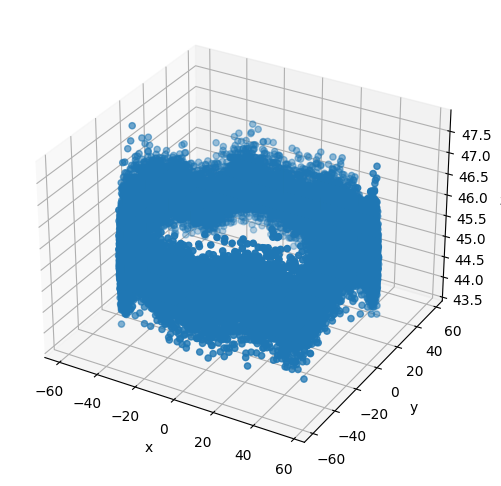

In [58]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df["x"],df["y"],df["z"])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# removing a single row that is a significant outlier
# and may ruin the velocity field analysis
problematic_rows = df.index[df['z'] > 50].tolist()
df.drop(problematic_rows)

plt.show()